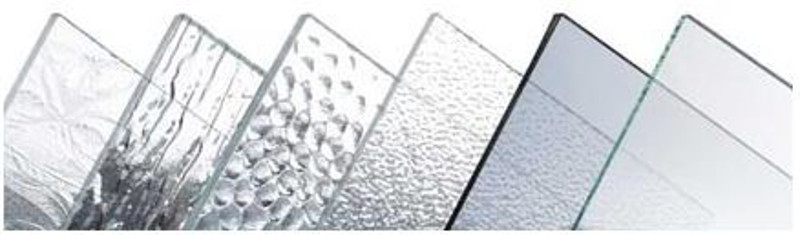

# Predicting glass type based on its properties

#### Authors
* Claudio S. Castillo
* Carla Cespedes
* Janet Casmartino

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-glass-type-based-on-its-properties" data-toc-modified-id="Predicting-glass-type-based-on-its-properties-1">Predicting glass type based on its properties</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Authors" data-toc-modified-id="Authors-1.0.0.1">Authors</a></span></li></ul></li></ul></li><li><span><a href="#Introduction:-Understanding-the-problem-and-the-dataset" data-toc-modified-id="Introduction:-Understanding-the-problem-and-the-dataset-1.1">Introduction: Understanding the problem and the dataset</a></span><ul class="toc-item"><li><span><a href="#The-Problem" data-toc-modified-id="The-Problem-1.1.1">The Problem</a></span></li><li><span><a href="#The-Dataset" data-toc-modified-id="The-Dataset-1.1.2">The Dataset</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.1.2.1">Exploratory Data Analysis (EDA)</a></span></li></ul></li></ul></li><li><span><a href="#Preparing-the-dataset" data-toc-modified-id="Preparing-the-dataset-1.2">Preparing the dataset</a></span><ul class="toc-item"><li><span><a href="#Settings:-Choosing-the-class-column,-splitting-the-dataset-and-standardizing-the-features" data-toc-modified-id="Settings:-Choosing-the-class-column,-splitting-the-dataset-and-standardizing-the-features-1.2.1">Settings: Choosing the class column, splitting the dataset and standardizing the features</a></span></li><li><span><a href="#Selecting-the-number-of-features-and-running-the-model(s)" data-toc-modified-id="Selecting-the-number-of-features-and-running-the-model(s)-1.2.2">Selecting the number of features and running the model(s)</a></span></li></ul></li><li><span><a href="#Is-it-enough?" data-toc-modified-id="Is-it-enough?-1.3">Is it enough?</a></span><ul class="toc-item"><li><span><a href="#Improving-the-model-accuracy-with-Principal-Component-Analysis-(PCA)" data-toc-modified-id="Improving-the-model-accuracy-with-Principal-Component-Analysis-(PCA)-1.3.1">Improving the model accuracy with Principal Component Analysis (PCA)</a></span></li></ul></li></ul></li></ul></div>

## Introduction: Understanding the problem and the dataset

### The Problem

For the final Predictive Analytics Algorithms project, we were asked to find a multiclass dataset that will allow us to train simple machine learning algorithms for classification. Therefore, it was crucial the quality of the dataset and the amount of useful information that it contains.
The Glass Identification Dataset used in this project was found at the UCI Machine Learning Repository website. The dataset collected classifies the types of glass into two group of classes. The first-class group categorizes the data into a very specific type of glass, such as: building windows float processed, building windows non-float processed, vehicle windows float processed, containers, tableware, and headlamps. On the other hand, the second-class group categorizes the data into a wider spectrum (three classes): building windows float processed, building windows non-float processed, and vehicle windows float processed. The dataset is composed of 11 columns (10 attributes and one id number) and 214 rows or instances. It is important to point out that this dataset does not present null values, which exempted us from dealing with missing data. The following is a list of the attribute information:

1.       Id number: 1 to 214
2.       RI: refractive index                                                                                                                                                                                                  
3.       Na: Sodium
4.       Mg: Magnesium
5.       Al: Aluminum
6.       Si: Silicon
7.       K: Potassium
8.       Ca: Calcium
9.       Ba: Barium
10.   Fe: Iron
11.   Type of glass: (class attribute)

The Glass Identification Dataset was collected primarily with the purpose of helping criminology investigation to identify the type of glass found in a crime scene. A well identified glass can be used as evidence to resolve a crime investigation. Besides criminology investigation, another great use of glass identification is for recycling.


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as wd
from ipywidgets import interact
import seaborn as sns
from IPython.display import Javascript, display

In [55]:
glass = pd.read_csv('glass.csv')
glass = glass.iloc[:,1:]

### The Dataset

In [56]:
parent_glass_class = {
                    1:1,
                    2:2,
                    3:1,
                    4:2,
                    5:3,
                    6:3,
                    7:3
}
glass['parent'] = glass.glass_type.map(parent_glass_class)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,parent
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


#### Exploratory Data Analysis (EDA)

In [57]:
glass.iloc[:,:9].describe()

,ri,na,mg,al,si,k,ca,ba,fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [58]:
@interact
def exploration_of_the_data(target = wd.RadioButtons(options = glass.columns[-2:]), 
                           feat = wd.ToggleButtons(options = glass.columns[:9])):
    sns.violinplot(x = target, y = feat,  data = glass)
    

interactive(children=(RadioButtons(description='target', options=('glass_type', 'parent'), value='glass_type')…

## Preparing the dataset
### Settings: Choosing the class column, splitting the dataset and standardizing the features

In [59]:
@interact
def settings(target = wd.RadioButtons(options = ['glass_type', 'parent']),
             split_dataset = wd.FloatSlider(min = 0.1, max = 0.9, value = 0.3),
            standarization = wd.RadioButtons(options = ['StandardScaler', 'MinMaxScaler'])):
    
    
    global X, y, X_train, X_test, y_train, y_test, X_train_std, X_test_std, k
    X = glass.iloc[:,:9]
    y = glass[target]
    
    # splitting the data into 70-30%
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_dataset, random_state = 1, stratify = y)
    
    # standardizing the variables
    
    if standarization == 'StandardScaler':
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
    else:
        from sklearn.preprocessing import MinMaxScaler
        sc = MinMaxScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
    print('Settings')
    print('-------- ')
    print('Target------------> ' + target)
    print('Size--------------> ' + str(split_dataset))  
    print('Standardization---> ' + standarization)
 
    print("")

   
    from matplotlib import cm
    cmap = cm.get_cmap('Set1')
    scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s = 40, hist_kwds = {'bins':15}, figsize=(15,15), cmap = cmap, alpha = 0.8)
    plt.show()
    
    print("")
   

    
    # random forest to rank feature importance
    from sklearn.ensemble import RandomForestClassifier
    feat_labels = X.columns
    forest = RandomForestClassifier(n_estimators= 500, random_state=1)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]



    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 10,feat_labels[indices[f]],importances[indices[f]]))


    plt.title('Feature importance')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.title('Ranking by Random Forest')
    plt.show()
    
    
    from sklearn.base import clone
    from itertools import combinations
    #import numpy as np
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split


    class SBS():
        def __init__(self, estimator, k_features, scoring=accuracy_score,
                     test_size=0.25, random_state=1):
            self.scoring = scoring
            self.estimator = clone(estimator)
            self.k_features = k_features
            self.test_size = test_size
            self.random_state = random_state

        def fit(self, X, y):

            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size,
                                 random_state=self.random_state)

            dim = X_train.shape[1]
            self.indices_ = tuple(range(dim))
            self.subsets_ = [self.indices_]
            score = self._calc_score(X_train, y_train, 
                                     X_test, y_test, self.indices_)
            self.scores_ = [score]

            while dim > self.k_features:
                scores = []
                subsets = []

                for p in combinations(self.indices_, r=dim - 1):
                    score = self._calc_score(X_train, y_train, 
                                             X_test, y_test, p)
                    scores.append(score)
                    subsets.append(p)

                best = np.argmax(scores)
                self.indices_ = subsets[best]
                self.subsets_.append(self.indices_)
                dim -= 1

                self.scores_.append(scores[best])
            self.k_score_ = self.scores_[-1]

            return self

        def transform(self, X):
            return X[:, self.indices_]

        def _calc_score(self, X_train, y_train, X_test, y_test, indices):
            self.estimator.fit(X_train[:, indices], y_train)
            y_pred = self.estimator.predict(X_test[:, indices])
            score = self.scoring(y_test, y_pred)
            return score
        
   
    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier(n_neighbors=5)

    # selecting features
    sbs = SBS(knn, k_features=1)
    sbs.fit(X_train_std, y_train)

    # plotting performance of feature subsets
    k_feat = [len(k) for k in sbs.subsets_]

    plt.plot(k_feat, sbs.scores_, marker='o')
    plt.ylim([0, 1.02])
    plt.ylabel('Accuracy')
    plt.xlabel('Number of features')
    plt.grid()
    plt.tight_layout()
    # plt.savefig('images/04_08.png', dpi=300)
    plt.title('Sequential Backguard Selection')
    plt.show()
    
    k = sbs.subsets_

interactive(children=(RadioButtons(description='target', options=('glass_type', 'parent'), value='glass_type')…

In [60]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', '1','2','3')
    colors = ('orange', 'blue', 'lightgreen', 'gray', 'cyan', 'yellow','white', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='purple')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### Selecting the number of features and running the model(s)

In [61]:
# selecting the number of features
@interact
def select_amount_of_features(features = wd.ToggleButtons(options = [len(i) for i in k][-1::-1], value = 2)):
    global kf
    kf = list(k[-1::-1][features - 1])
    print('Selected Features: ', list(X.columns[kf]))

    # selecting the model
    @interact
    def select_ml_model(model = wd.ToggleButtons(options = ['Perceptron', 'LR', 'SVM', 'Decision Tree', 'Rnd Forest', 'KNN'])):

        X_combined_std = np.vstack((X_train_std, X_test_std))
        y_combined = np.hstack((y_train, y_test))

        if   model == 'Perceptron':

            from sklearn.linear_model import Perceptron

            ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
            ppn.fit(X_train_std[:,kf], y_train)
            print('Accuracy: '+str(ppn.score(X_test_std[:,kf],y_test)))

            if len(kf)==2 and len(y.unique()<=5):

                plt.figure(figsize=(10,8))

                plot_decision_regions(X=X_combined_std[:,kf], y=y_combined,
                          classifier=ppn)
                plt.title(model + '        '+ 'Accuracy: '+str(ppn.score(X_test_std[:,kf],y_test)))
                plt.xlabel(X.columns[kf][0])
                plt.ylabel(X.columns[kf][1])

                plt.show()

        elif model == 'LR':
            # logistic regression
            from sklearn.linear_model import LogisticRegression

            lr = LogisticRegression(C=100.0, random_state=1)
            lr.fit(X_train_std[:,kf], y_train)

            print('Accuracy: '+str(lr.score(X_test_std[:,kf],y_test)))

            if len(kf)==2 and len(y.unique()<=5):
                plt.figure(figsize=(10,8))

                plot_decision_regions(X_combined_std[:,kf], y_combined,
                                      classifier=lr)
                plt.title(model + '        '+ 'Accuracy: '+str(lr.score(X_test_std[:,kf],y_test)))
                plt.xlabel(X.columns[kf][0])
                plt.ylabel(X.columns[kf][1])

        elif model == 'SVM':

            from sklearn.svm import SVC
            svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=1.0)
            svm.fit(X_train_std[:,kf], y_train)

            print('Accuracy: '+str(svm.score(X_test_std[:,kf],y_test)))

            if len(kf)==2 and len(y.unique()<=5):
                plt.figure(figsize=(10,8))
                plot_decision_regions(X_combined_std[:,kf], y_combined,
                                      classifier=svm)

                plt.title(model + '        '+ 'Accuracy: '+str(svm.score(X_test_std[:,kf],y_test)))
                plt.xlabel(X.columns[kf][0])
                plt.ylabel(X.columns[kf][1])

        elif model == 'Decision Tree':
            from sklearn.tree import DecisionTreeClassifier
            tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
            tree.fit(X_train_std[:,kf], y_train)

            print('Accuracy: '+str(tree.score(X_test_std[:,kf],y_test)))

            if len(kf)==2 and len(y.unique()<=5):
                plt.figure(figsize=(10,8))
                plot_decision_regions(X_combined_std[:,kf], y_combined,
                                      classifier=tree)

                plt.title(model + '        '+ 'Accuracy: '+str(tree.score(X_test_std[:,kf],y_test)))        
                plt.xlabel(X.columns[kf][0])
                plt.ylabel(X.columns[kf][1])
    #             from pydotplus import graph_from_dot_data
    #             from sklearn.tree import export_graphviz

    #             dot_data = export_graphviz(tree,
    #                                        filled=True, 
    #                                        rounded=True,
    #                                        class_names=[str(i) for i in  y.unique()],
    #                                        feature_names=X.columns[kf].values,
    #                                        out_file=None) 
    #             graph = graph_from_dot_data(dot_data) 
    #             graph.write_png('tree3.png')             

        elif model == 'Rnd Forest':

            from sklearn.ensemble import RandomForestClassifier
            from numpy.core.umath_tests import inner1d
            forest = RandomForestClassifier(criterion='gini',
                                            n_estimators=25, 
                                            random_state=1,
                                            n_jobs=2)
            forest.fit(X_train_std[:,kf], y_train)

            print('Accuracy: '+str(forest.score(X_test_std[:,kf],y_test)))

            if len(kf)==2 and len(y.unique()<=5):
                plt.figure(figsize=(10,8))

                plot_decision_regions(X_combined_std[:,kf], y_combined, 
                                      classifier=forest)
                plt.title(model + '        '+ 'Accuracy: '+str(forest.score(X_test_std[:,kf],y_test)))  
                plt.xlabel(X.columns[kf][0])
                plt.ylabel(X.columns[kf][1])

        else:        
            from sklearn.neighbors import KNeighborsClassifier

            knn = KNeighborsClassifier(n_neighbors=5, 
                                       p=2, 
                                       metric='minkowski')
            knn.fit(X_train_std[:,kf], y_train)

            print('Accuracy: '+str(knn.score(X_test_std[:,kf],y_test)))

            if len(kf)==2 and len(y.unique()<=5):
                plt.figure(figsize=(10,8))
                plot_decision_regions(X_combined_std[:,kf], y_combined, 
                                      classifier=knn)   

                plt.title(model + '        '+ 'Accuracy: '+str(knn.score(X_test_std[:,kf],y_test)))   
                plt.xlabel(X.columns[kf][0])
                plt.ylabel(X.columns[kf][1])

interactive(children=(ToggleButtons(description='features', index=1, options=(1, 2, 3, 4, 5, 6, 7, 8, 9), valu…

## Is it enough?
### Improving the model accuracy with Principal Component Analysis (PCA)

Principal component analysis (PCA) is a statistical procedure that uses a transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

In [72]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = wd.Button(description="Run below")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Run below', style=ButtonStyle())

In [73]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    Returns the k eigenvectors (alphas) that correspond to the k largest
        eigenvalues (lambdas).

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K_norm = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K_norm)

    # Obtaining the i eigenvectors (alphas) that corresponds to the i highest eigenvalues (lambdas).
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]

    return alphas, lambdas

In [74]:
@interact
def change_gamma(gamma=wd.FloatSlider(min=0.001, max = 1, value = 0.09)):
    X_pc = stepwise_kpca(np.array(X.iloc[:,kf]), gamma=gamma, n_components=2)
    global X_pc2
    X_pc2= X_pc[0]
    plt.figure(figsize=(10,8))
    plt.scatter(X_pc2[y==1, 0], X_pc2[y==1, 1], color='red', alpha=0.5)
    plt.scatter(X_pc2[y==2, 0], X_pc2[y==2, 1], color='blue', alpha=0.5)
    plt.scatter(X_pc2[y==3, 0], X_pc2[y==3, 1], color='green', alpha=0.5)

    plt.title('First 2 principal components after RBF Kernel PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

interactive(children=(FloatSlider(value=0.09, description='gamma', max=1.0, min=0.001), Output()), _dom_classe…

In [77]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = wd.Button(description="Run below")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Run below', style=ButtonStyle())

In [78]:
# selecting the model

@interact
def select_ml_model2(model = wd.ToggleButtons(options = ['Perceptron', 'LR', 'SVM', 'Decision Tree', 'Rnd Forest', 'KNN'])):

    #X_combined_std = np.vstack((X_train_std, X_test_std))
    #y_combined = np.hstack((y_train, y_test))
    
    if   model == 'Perceptron':

        from sklearn.linear_model import Perceptron

        ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
        ppn.fit(X_pc2, y)
        print('Accuracy: '+str(ppn.score(X_pc2,y)))
        
        
            
        plt.figure(figsize=(10,8))
            
        plot_decision_regions(X=X_pc2, y=y,
                      classifier=ppn)
        plt.title(model + '        '+ 'Accuracy: '+str(ppn.score(X_pc2,y)))

        plt.show()
        
    elif model == 'LR':
        # logistic regression
        from sklearn.linear_model import LogisticRegression

        lr = LogisticRegression(C=100.0, random_state=1)
        lr.fit(X_pc2, y)
        
        print('Accuracy: '+str(lr.score(X_pc2,y)))
        
        
        plt.figure(figsize=(10,8))

        plot_decision_regions(X_pc2, y,
                                  classifier=lr)
        plt.title(model + '        '+ 'Accuracy: '+str(lr.score(X_pc2,y)))
           
        
    elif model == 'SVM':
        
        from sklearn.svm import SVC
        svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=1.0)
        svm.fit(X_pc2, y)
        
        print('Accuracy: '+str(svm.score(X_pc2,y)))

        
        plt.figure(figsize=(10,8))
        plot_decision_regions(X_pc2, y,
                                  classifier=svm)

        plt.title(model + '        '+ 'Accuracy: '+str(svm.score(X_pc2, y)))

        
    elif model == 'Decision Tree':
        from sklearn.tree import DecisionTreeClassifier
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
        tree.fit(X_pc2, y)
        
        print('Accuracy: '+str(tree.score(X_pc2,y)))

        
        plt.figure(figsize=(10,8))
        plot_decision_regions(X_pc2, y,
                                  classifier=tree)

        plt.title(model + '        '+ 'Accuracy: '+str(tree.score(X_pc2,y)))        
            
#             from pydotplus import graph_from_dot_data
#             from sklearn.tree import export_graphviz

#             dot_data = export_graphviz(tree,
#                                        filled=True, 
#                                        rounded=True,
#                                        class_names=[str(i) for i in  y.unique()],
#                                        feature_names=X.columns[kf].values,
#                                        out_file=None) 
#             graph = graph_from_dot_data(dot_data) 
#             graph.write_png('tree3.png')             
        
    elif model == 'Rnd Forest':

        from sklearn.ensemble import RandomForestClassifier
        from numpy.core.umath_tests import inner1d
        forest = RandomForestClassifier(criterion='gini',
                                        n_estimators=500, 
                                        random_state=1,
                                        n_jobs=2)
        forest.fit(X_pc2, y)
        
        print('Accuracy: '+str(forest.score(X_pc2,y)))
        
        
        plt.figure(figsize=(10,8))

        plot_decision_regions(X_pc2, y, 
                                  classifier=forest)
        plt.title(model + '        '+ 'Accuracy: '+str(forest.score(X_pc2,y)))  
        
       
    else:        
        from sklearn.neighbors import KNeighborsClassifier

        knn = KNeighborsClassifier(n_neighbors=1, 
                                   p=2, 
                                   metric='minkowski')
        knn.fit(X_pc2, y)
        
        print('Accuracy: '+str(knn.score(X_pc2,y)))

        
        plt.figure(figsize=(10,8))
        plot_decision_regions(X_pc2, y, 
                                  classifier=knn)   
            
        plt.title(model + '        '+ 'Accuracy: '+str(knn.score(X_pc2,y))) 

interactive(children=(ToggleButtons(description='model', options=('Perceptron', 'LR', 'SVM', 'Decision Tree', …